In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
CarbonEmissionsFullDf = pd.read_csv('GreenHouseGasEmissions_SelectCountries_2007to2022.csv', index_col=0)
CarbonEmissionsFullDf.rename(columns={'iso_code':'iso3c'}, inplace=True)
CarbonEmissionsFullDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 527
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     528 non-null    object 
 1   year                        528 non-null    int64  
 2   iso3c                       528 non-null    object 
 3   population                  528 non-null    float64
 4   co2                         528 non-null    float64
 5   co2_growth_abs              528 non-null    float64
 6   co2_including_luc           528 non-null    float64
 7   co2_per_capita              528 non-null    float64
 8   co2_per_gdp                 396 non-null    float64
 9   co2_per_unit_energy         528 non-null    float64
 10  energy_per_capita           528 non-null    float64
 11  energy_per_gdp              396 non-null    float64
 12  primary_energy_consumption  528 non-null    float64
 13  total_ghg                   462 non-null

In [3]:
# Importind GDP data
gdpFullDf = pd.read_csv('gdp_per_hour_worked_filtered.csv', index_col=0)
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = gdpFullDf['gdp'] / gdpFullDf['labor_force']
gdpFullDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 12632 to 16818
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             528 non-null    int64  
 1   iso3c                            528 non-null    object 
 2   country                          528 non-null    object 
 3   pop                              528 non-null    float64
 4   labor_force                      528 non-null    float64
 5   gdp_ppp_c                        528 non-null    float64
 6   gdp_ppp                          528 non-null    float64
 7   gdp                              528 non-null    float64
 8   gdp_c                            528 non-null    float64
 9   hours_worked                     527 non-null    float64
 10  total_hours                      524 non-null    float64
 11  hours_per_employed               524 non-null    float64
 12  gdp_over_k_hours_work

In [4]:
GdpSelectColumns = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c', 'pop']]
Co2SelectColumns = CarbonEmissionsFullDf[['year', 'iso3c', 'country', 'co2', 'primary_energy_consumption', 'co2_per_capita']]

In [5]:
Co2AndGdp = pd.merge(Co2SelectColumns, GdpSelectColumns, on=['year', 'iso3c'], how='outer')

In [6]:
Co2AndGdp.head()

,year,iso3c,country_x,co2,primary_energy_consumption,co2_per_capita,country_y,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c,pop
0,2007,AUS,Australia,399.676,1506.167,19.187,Australia,78120.920741,69751.995589,47828.591243,20827622.0
1,2008,AUS,Australia,404.256,1531.745,19.026,Australia,94016.234615,70998.405750,50302.298232,21249199.0
2,2009,AUS,Australia,407.477,1509.545,18.812,Australia,80948.562765,76214.185930,49719.834682,21691653.0
3,2010,AUS,Australia,405.512,1508.839,18.416,Australia,98495.003196,74370.535590,50413.096897,22031750.0
4,2011,AUS,Australia,404.257,1558.602,18.082,Australia,118090.519994,79265.902613,50256.888884,22340024.0


In [7]:
Co2AndGdp.rename(columns={'year':'Year', 'country_x':'country', 'co2':'CO2 Output (million tons)', 'gdp_over_labor_force':'GDP per Worker $', 
                          'gdp_ppp_over_labor_force':'GDP PPP per Worker $', 'gdp_ppp_over_k_hours_worked_c':'PPP per Hour Worked'}, inplace=True)
Co2AndGdp.drop(columns={'country_y'}, inplace=True)
Co2AndGdp.head()

,Year,iso3c,country,CO2 Output (million tons),primary_energy_consumption,co2_per_capita,GDP per Worker $,GDP PPP per Worker $,PPP per Hour Worked,pop
0,2007,AUS,Australia,399.676,1506.167,19.187,78120.920741,69751.995589,47828.591243,20827622.0
1,2008,AUS,Australia,404.256,1531.745,19.026,94016.234615,70998.405750,50302.298232,21249199.0
2,2009,AUS,Australia,407.477,1509.545,18.812,80948.562765,76214.185930,49719.834682,21691653.0
3,2010,AUS,Australia,405.512,1508.839,18.416,98495.003196,74370.535590,50413.096897,22031750.0
4,2011,AUS,Australia,404.257,1558.602,18.082,118090.519994,79265.902613,50256.888884,22340024.0


In [8]:
Co2AndGdp['iso3c'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'HRV', 'CZE', 'DNK', 'EST', 'FIN',
       'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 'ITA', 'JPN', 'LVA',
       'LTU', 'LUX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN',
       'KOR', 'ESP', 'SWE', 'CHE', 'GBR', 'USA'], dtype=object)

In [9]:
Co2AndGdp[Co2AndGdp['iso3c'] == 'LTU'][['Year', 'CO2 Output (million tons)', 'GDP per Worker $', 'GDP PPP per Worker $', 'PPP per Hour Worked']].corr()

,Year,CO2 Output (million tons),GDP per Worker $,GDP PPP per Worker $,PPP per Hour Worked
Year,1.000000,-0.528539,0.855229,0.974416,0.971276
CO2 Output (million tons),-0.528539,1.000000,-0.245334,-0.397269,-0.379896
GDP per Worker $,0.855229,-0.245334,1.000000,0.934383,0.912302
GDP PPP per Worker $,0.974416,-0.397269,0.934383,1.000000,0.973760
PPP per Hour Worked,0.971276,-0.379896,0.912302,0.973760,1.000000


In [10]:
countryCodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'HRV', 
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
    'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 
    'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 
    'LUX', 'NLD', 'NZL', 'NOR', 'POL', 
    'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 
    'CHE', 'GBR', 'USA']

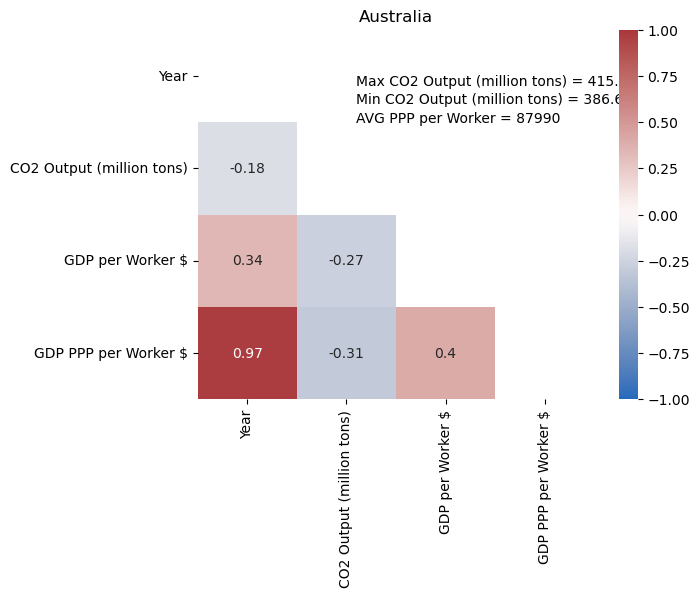

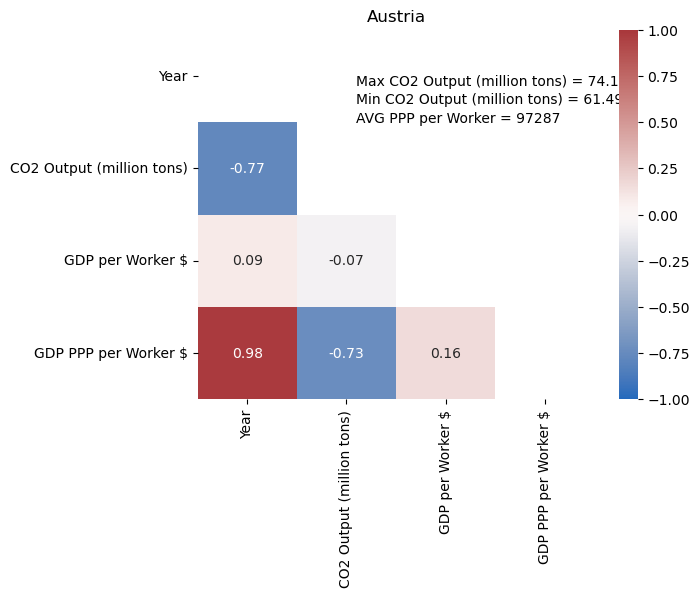

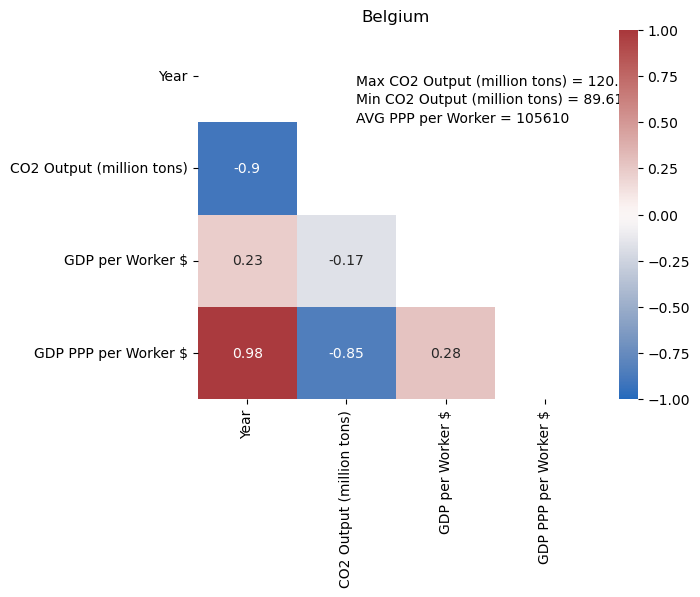

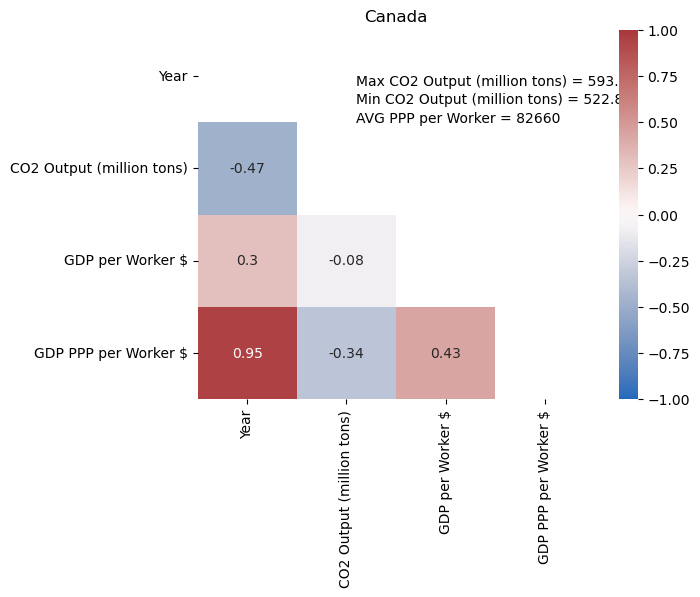

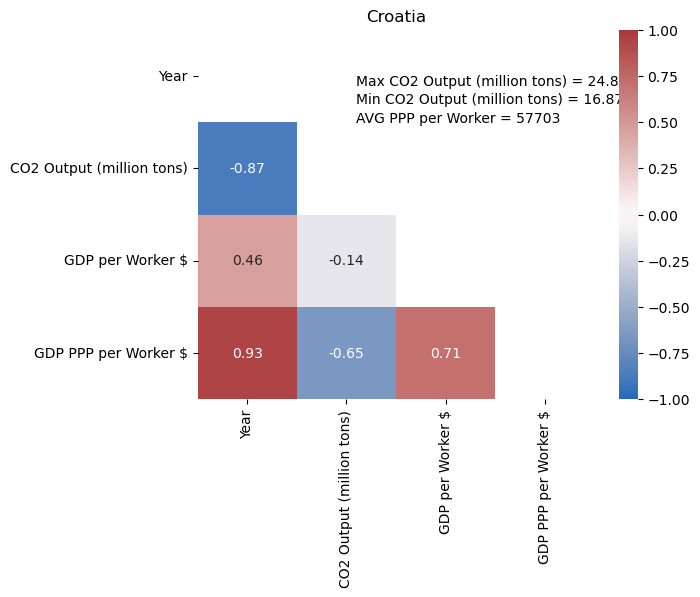

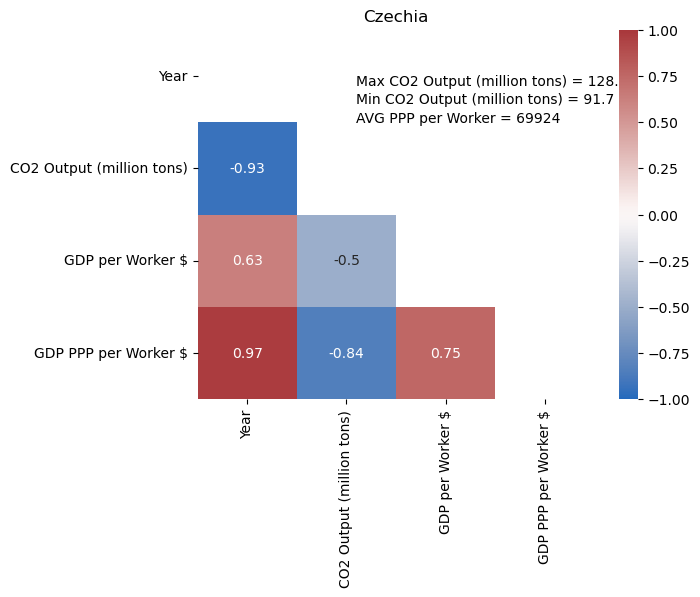

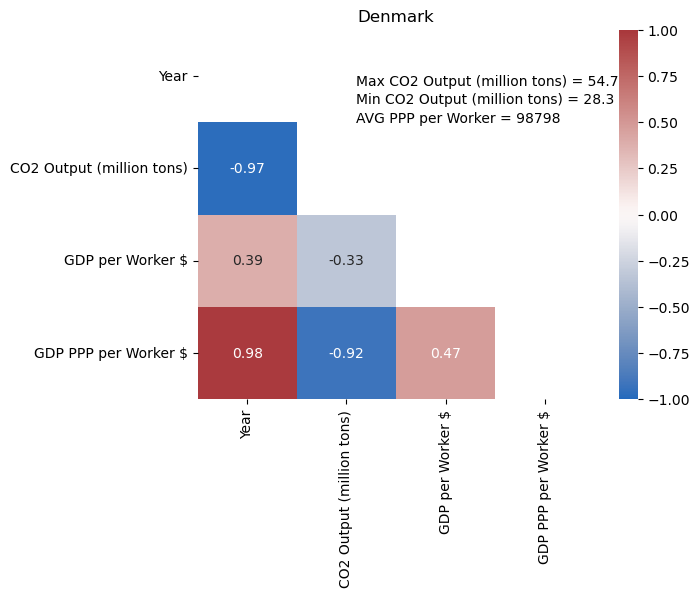

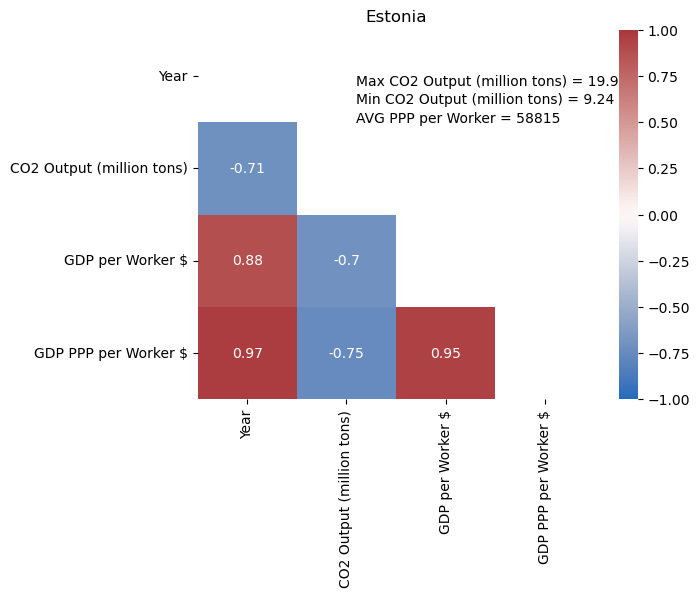

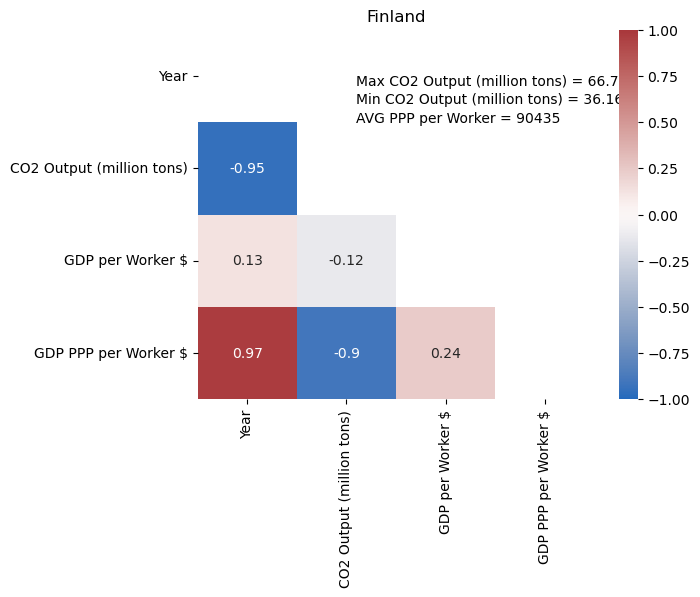

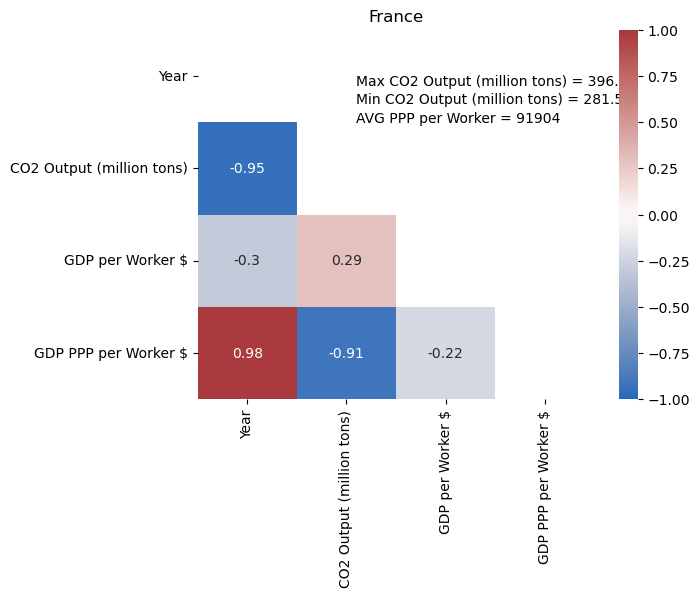

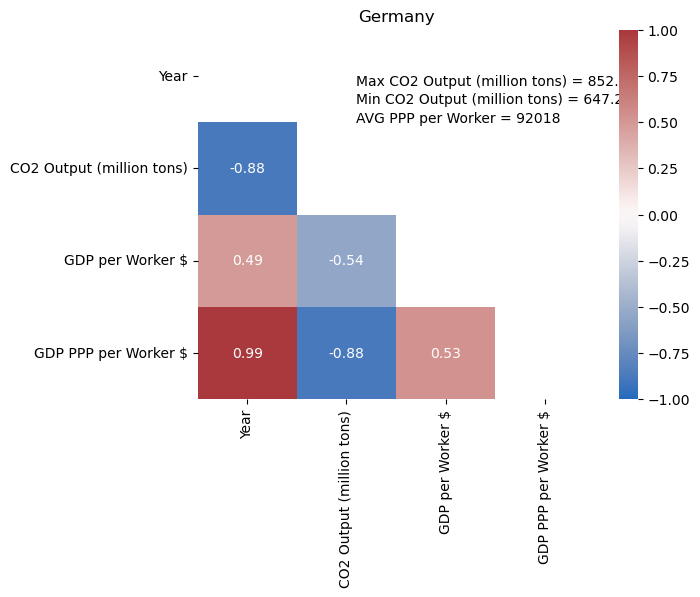

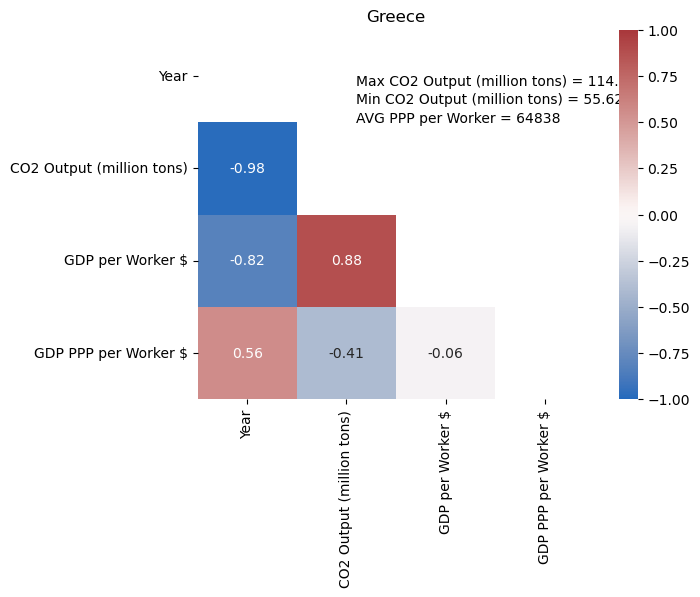

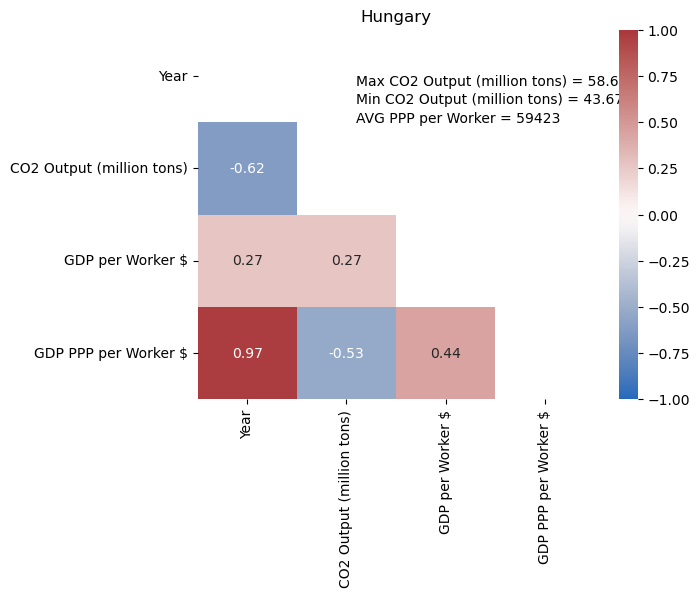

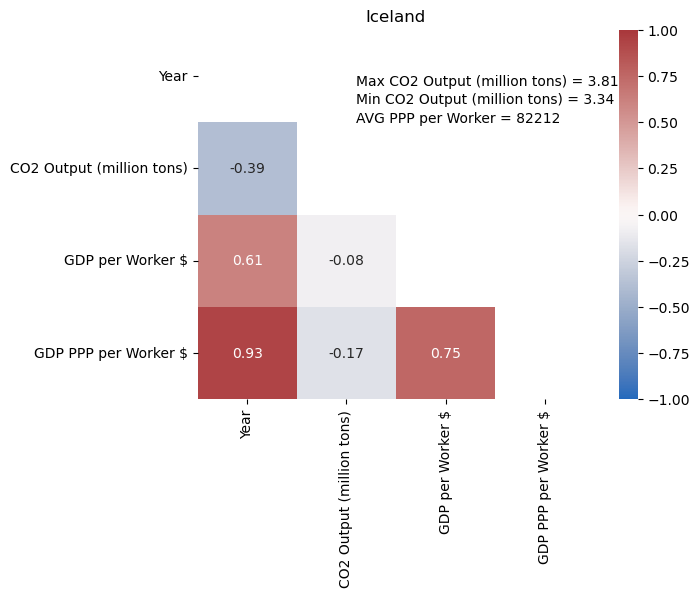

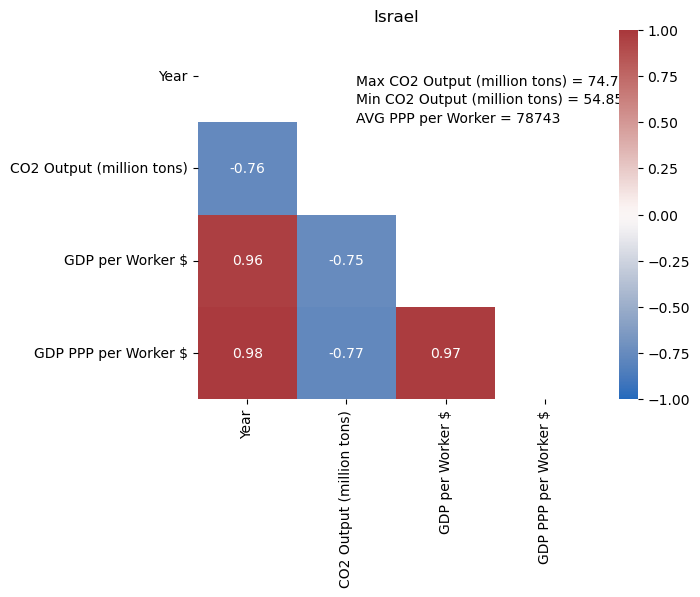

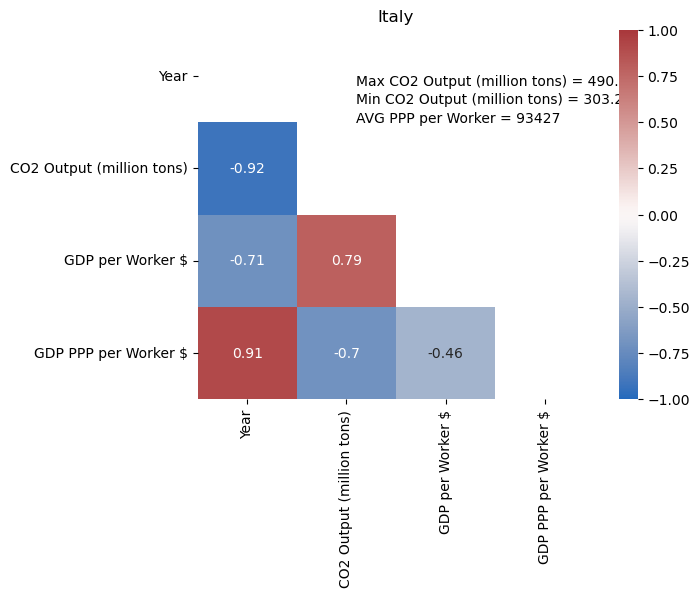

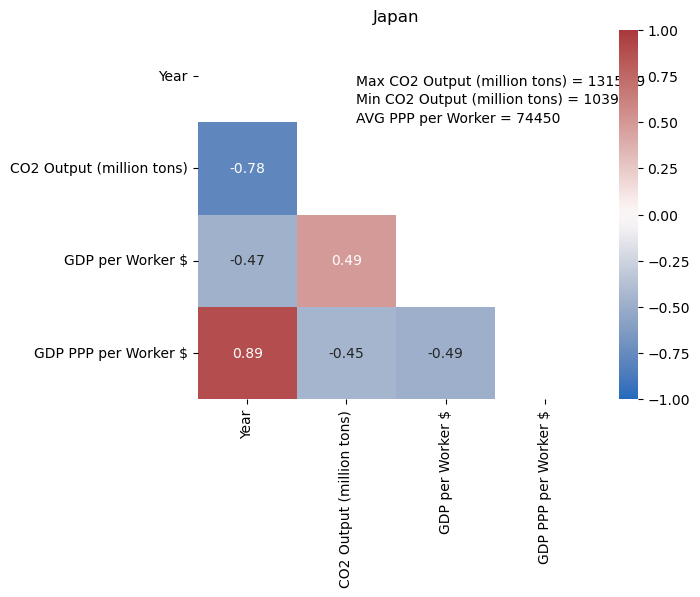

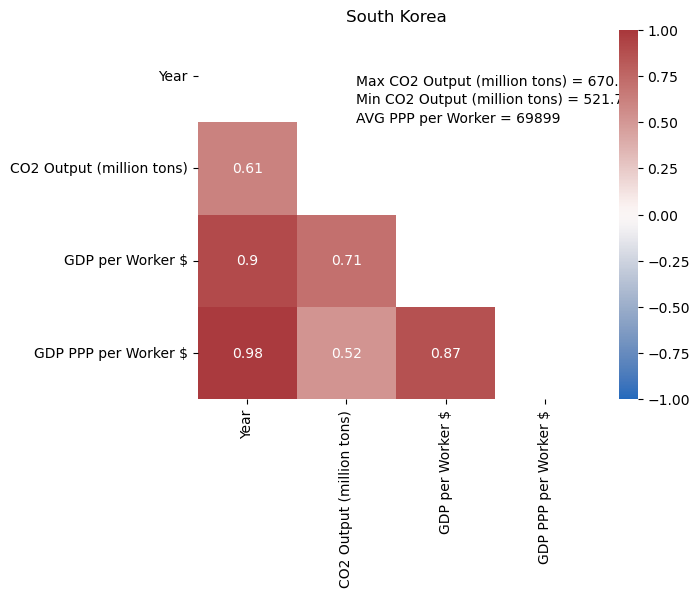

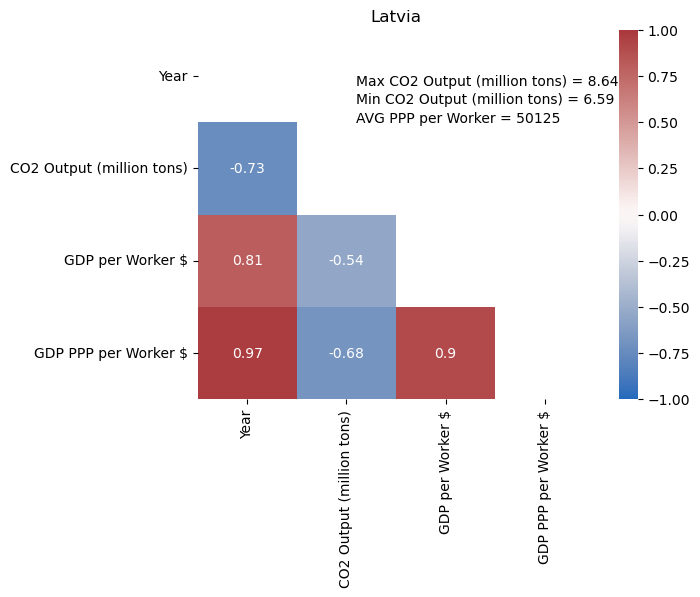

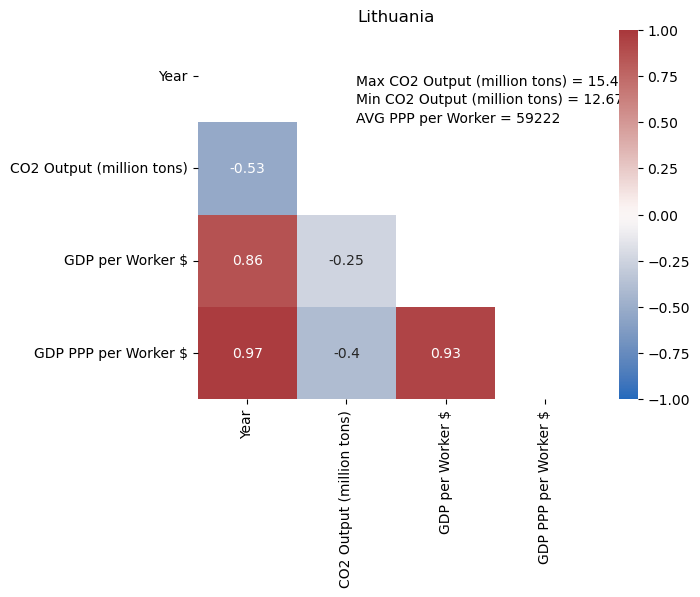

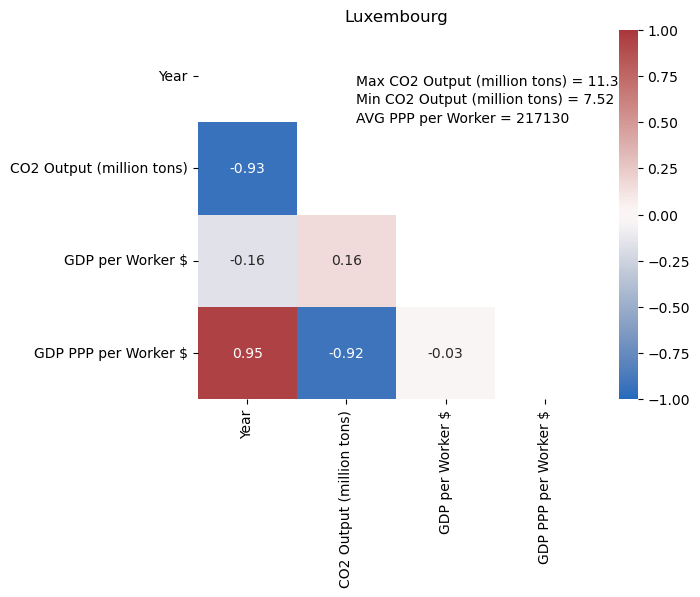

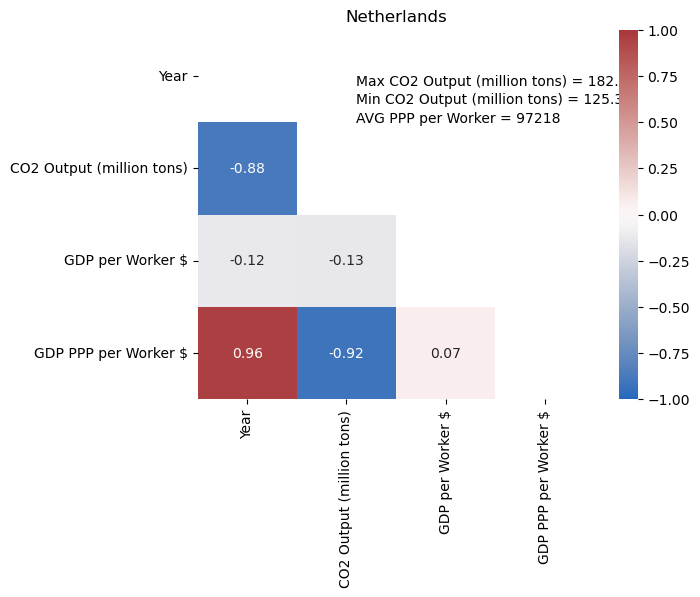

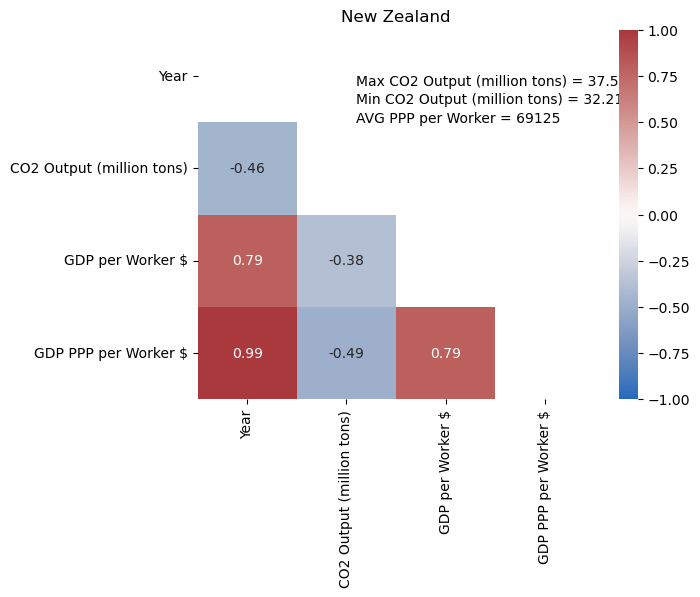

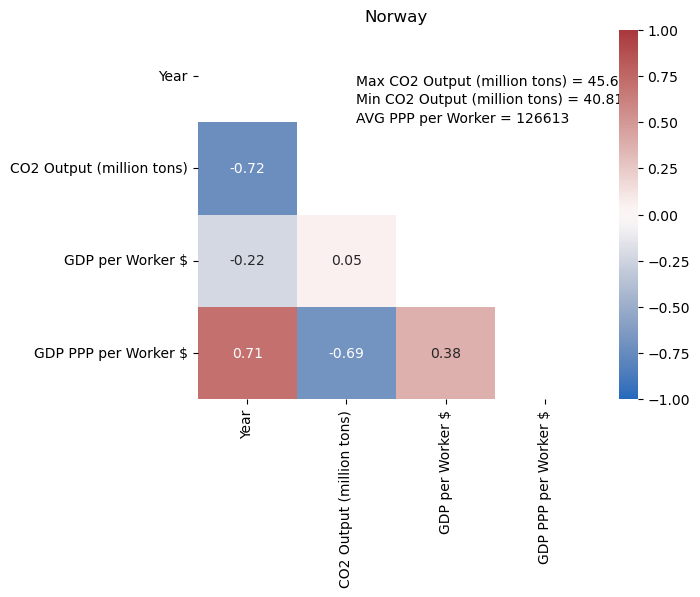

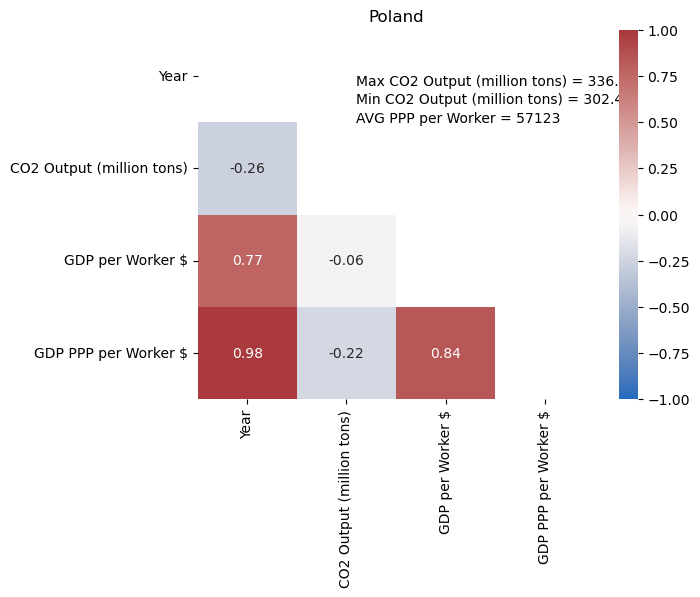

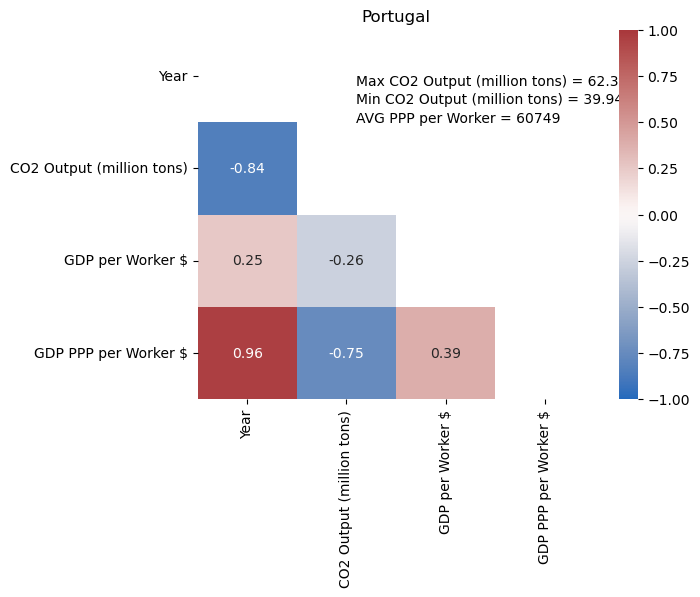

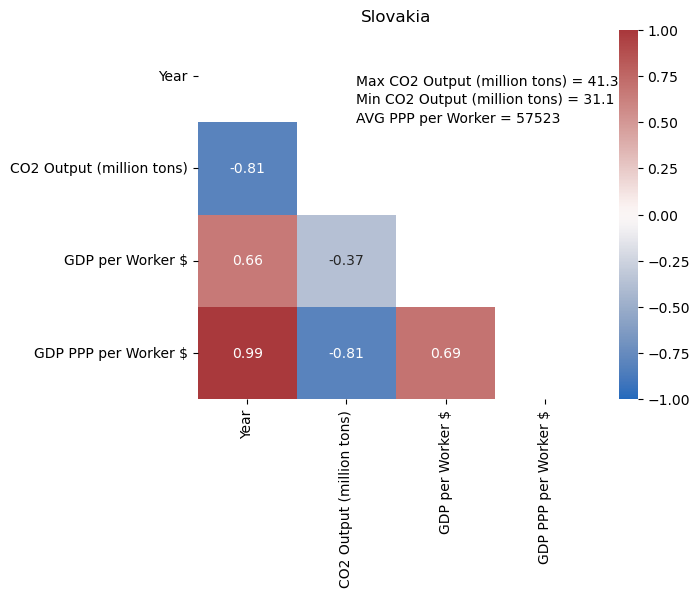

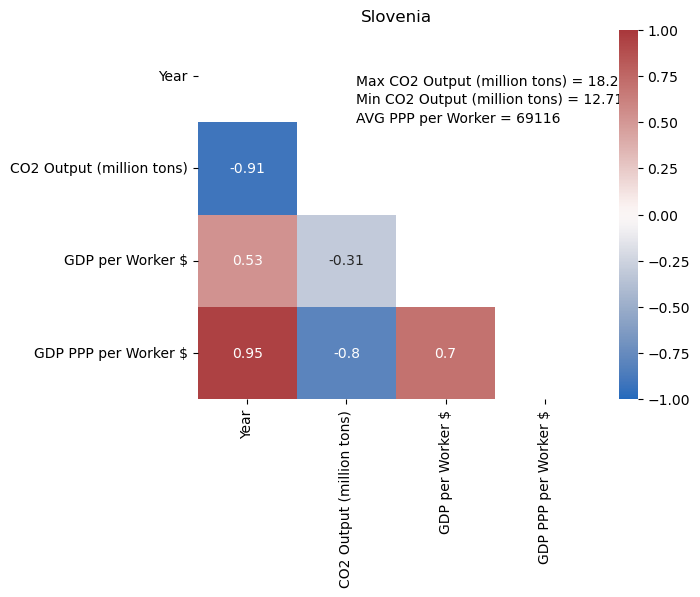

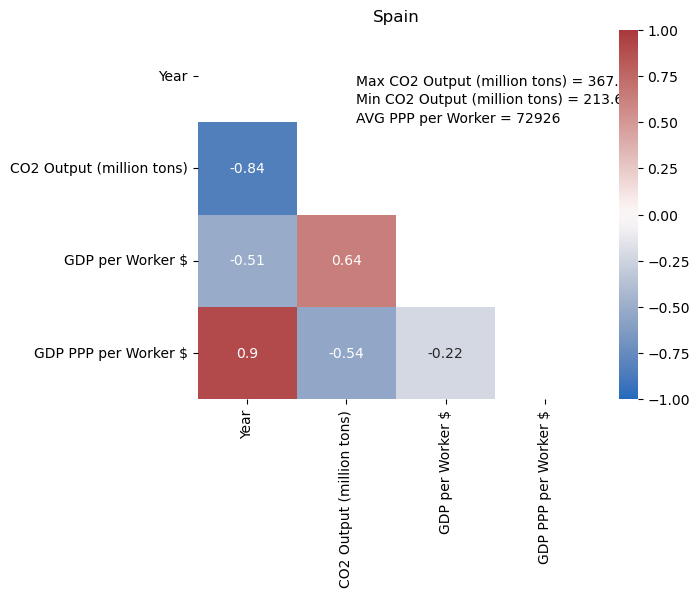

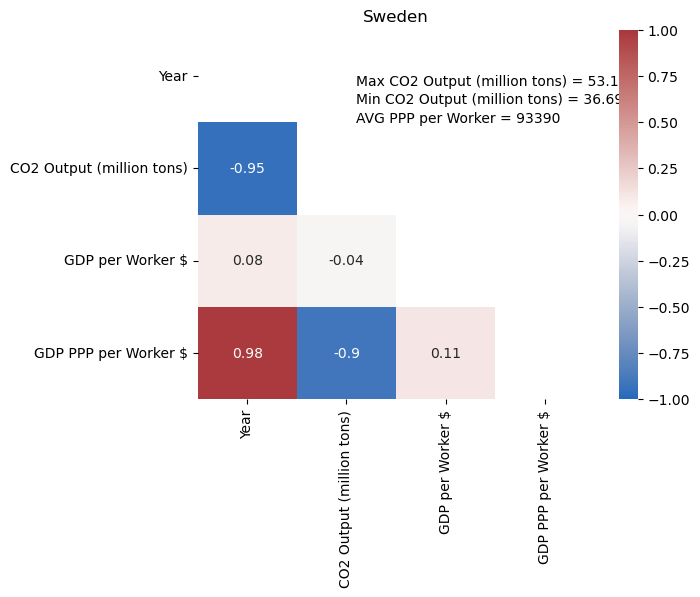

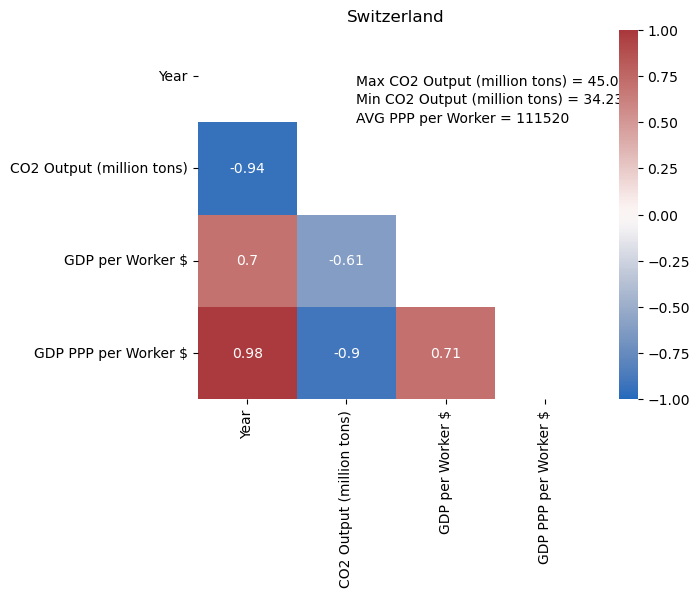

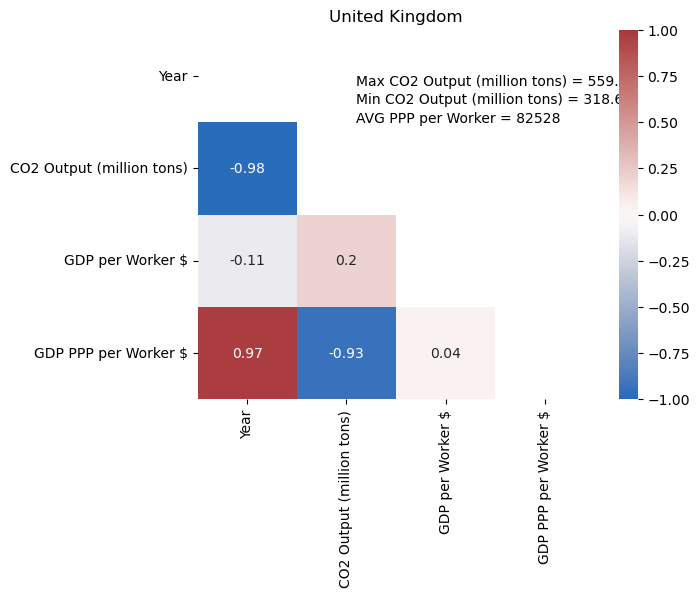

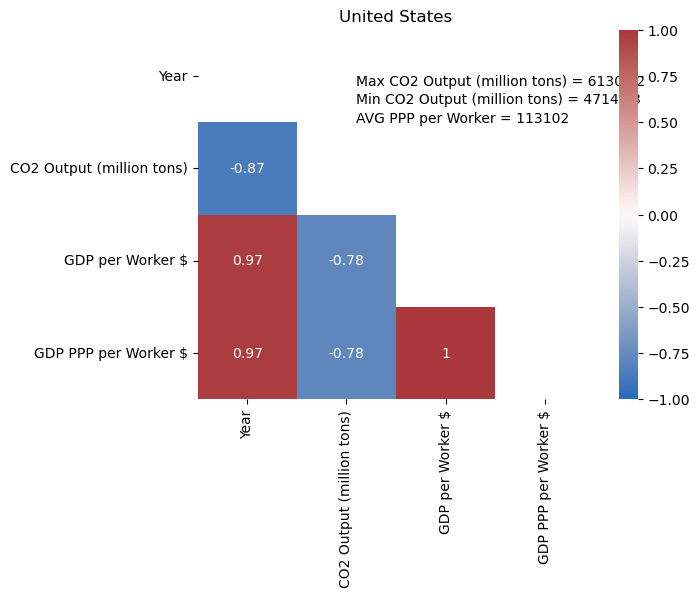

In [11]:
for idex, code in enumerate(countryCodes):
    matrix = Co2AndGdp[Co2AndGdp['iso3c'] == code][['Year', 'CO2 Output (million tons)', 'GDP per Worker $', 'GDP PPP per Worker $']].corr().round(2)
    HappinessMax = Co2AndGdp[Co2AndGdp['iso3c'] == code]['CO2 Output (million tons)'].max()
    HappinessMin = Co2AndGdp[Co2AndGdp['iso3c'] == code]['CO2 Output (million tons)'].min()
    PPPperWorkerAvg = Co2AndGdp[Co2AndGdp['iso3c'] == code]['GDP PPP per Worker $'].mean()

    mask = np.triu(np.ones_like(matrix, dtype=bool))
    heatMap = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    ax = plt.gca()

    plt.text(.4, .85, "Max CO2 Output (million tons) = {}".format(round(HappinessMax, 2)), transform=ax.transAxes)
    plt.text(.4, .8, "Min CO2 Output (million tons) = {}".format(round(HappinessMin, 2)), transform=ax.transAxes)
    plt.text(.4, .75, "AVG PPP per Worker = {}".format(round(PPPperWorkerAvg)), transform=ax.transAxes)
    plt.title(Co2AndGdp[(Co2AndGdp['iso3c'] == code) & (Co2AndGdp['Year'] == 2015)]['country'].to_string(index=False))
    fig = heatMap.get_figure()
    fig.savefig('GdpAndCO2_HeatMap_{}'.format(Co2AndGdp[(Co2AndGdp['iso3c'] == code) & (Co2AndGdp['Year'] == 2015)]['country'].to_string(index=False)), dpi=300, bbox_inches='tight')
    plt.show()

In [12]:
for index, code in enumerate(countryCodes):
    Co2Gdp = Co2AndGdp[Co2AndGdp['iso3c'] == code][['GDP per Worker $', 'GDP PPP per Worker $', 'CO2 Output (million tons)', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = Co2AndGdp[Co2AndGdp['iso3c'] == code][['GDP per Worker $', 'GDP PPP per Worker $', 'CO2 Output (million tons)', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Gdp < -.75 or Co2Ppp < -.75):
        print(Co2AndGdp[(Co2AndGdp['iso3c'] == code) & (Co2AndGdp['Year'] == 2021)]['country'])

46    Belgium
Name: country, dtype: object
94    Czechia
Name: country, dtype: object
110    Denmark
Name: country, dtype: object
142    Finland
Name: country, dtype: object
158    France
Name: country, dtype: object
174    Germany
Name: country, dtype: object
238    Israel
Name: country, dtype: object
318    Luxembourg
Name: country, dtype: object
334    Netherlands
Name: country, dtype: object
414    Slovakia
Name: country, dtype: object
430    Slovenia
Name: country, dtype: object
478    Sweden
Name: country, dtype: object
494    Switzerland
Name: country, dtype: object
510    United Kingdom
Name: country, dtype: object
526    United States
Name: country, dtype: object


In [13]:
Co2AndGdp[Co2AndGdp['Year'] == 2022].sort_values(by='CO2 Output (million tons)', ascending=False)

,Year,iso3c,country,CO2 Output (million tons),primary_energy_consumption,co2_per_capita,GDP per Worker $,GDP PPP per Worker $,PPP per Hour Worked,pop
527,2022,USA,United States,5057.304,26641.771,14.950,150462.830076,150462.830076,76150.654655,333287557.0
271,2022,JPN,Japan,1053.798,4956.198,8.502,61381.982517,82724.172431,47464.179457,125124989.0
175,2022,DEU,Germany,665.605,3416.287,7.984,91478.449844,119275.954363,73730.332441,84079811.0
447,2022,KOR,South Korea,600.999,3530.013,11.599,57022.262544,88517.372003,44081.597602,51628117.0
63,2022,CAN,Canada,547.944,3928.505,14.249,100250.209671,106511.563739,56688.258465,38929902.0
15,2022,AUS,Australia,392.279,1661.188,14.985,118724.433418,115289.118520,56060.627409,25978935.0
255,2022,ITA,Italy,338.097,1706.785,5.727,78896.861457,119795.806140,59549.112288,58856847.0
383,2022,POL,Poland,323.117,1198.322,8.107,37027.667633,87446.574569,45112.670255,37561599.0
511,2022,GBR,United Kingdom,318.654,2031.876,4.720,89107.167167,106116.310388,62535.053068,66971411.0
159,2022,FRA,France,297.534,2329.906,4.604,87927.906825,119113.477889,69656.848125,67935660.0


In [14]:
Co2AndGdp['Co2Efficiency'] = Co2AndGdp['GDP per Worker $'] / Co2AndGdp['CO2 Output (million tons)']

In [15]:
Co2AndGdp[Co2AndGdp['Year'] == 2012].sort_values(by='Co2Efficiency', ascending=False)

,Year,iso3c,country,CO2 Output (million tons),primary_energy_consumption,co2_per_capita,GDP per Worker $,GDP PPP per Worker $,PPP per Hour Worked,pop,Co2Efficiency
213,2012,ISL,Iceland,3.501,56.898,10.908,78024.299485,71254.018079,60933.102909,320716.0,22286.289484
309,2012,LUX,Luxembourg,10.872,47.953,20.490,231101.115860,198364.349127,103875.185889,530946.0,21256.541194
357,2012,NOR,Norway,44.228,562.048,8.812,191805.169184,123471.957133,82801.370634,5018573.0,4336.736212
277,2012,LVA,Latvia,7.521,45.963,3.662,27088.971442,41649.640840,33185.792687,2034319.0,3601.777881
485,2012,CHE,Switzerland,42.249,350.930,5.284,149550.147401,103562.330737,70590.124814,7996861.0,3539.732240
421,2012,SVN,Slovenia,15.760,81.758,7.616,46001.032242,59005.883345,43484.830194,2057159.0,2918.847223
101,2012,DNK,Denmark,39.861,199.192,7.117,113920.350496,87238.098762,72719.657180,5591572.0,2857.940104
469,2012,SWE,Sweden,46.712,652.446,4.888,109879.224216,86014.262176,68317.972767,9519374.0,2352.269743
293,2012,LTU,Lithuania,14.056,68.601,4.588,29158.096991,50134.119913,38185.321017,2987773.0,2074.423520
341,2012,NZL,New Zealand,35.944,237.845,8.150,74512.666557,61492.654175,45343.606197,4408100.0,2073.020993


In [16]:
countriesOfInterest = [
    'Spain', 'Germany', 'Norway', 'Sweden',  'Denmark', 'Finland', 'United Kingdom', 'France', 'Italy', 'Portugal', 'Switzerland', 'Luxembourg', 'Austria', 'Belgium',
    'Greece', 'Canada', 'New Zealand', 'Australia'
]
Co2AndGdp[(Co2AndGdp['Year'] == 2022) & (Co2AndGdp['country'].isin(countriesOfInterest))]['CO2 Output (million tons)'].sum()

3277.2850000000003

In [17]:
AvgCo2Outputs = pd.DataFrame(columns = ['country', 'iso3c', 'AvgCO2perCapita'])
for index, code in enumerate(countryCodes):
    co2Mean = round(Co2AndGdp[Co2AndGdp['iso3c'] == code]['co2_per_capita'].mean(), 2)
    newRow = pd.DataFrame([{'country':Co2AndGdp[Co2AndGdp['iso3c'] == code]['country'].unique()[0], 'iso3c':code, 'AvgCO2perCapita':co2Mean}])
    AvgCo2Outputs = pd.concat([AvgCo2Outputs, newRow], ignore_index=True)

In [18]:
AvgCo2Outputs.sort_values('AvgCO2perCapita', ascending=True)

,country,iso3c,AvgCO2perCapita
18,Latvia,LVA,3.76
4,Croatia,HRV,4.54
19,Lithuania,LTU,4.55
29,Sweden,SWE,4.58
25,Portugal,PRT,4.85
30,Switzerland,CHE,4.89
12,Hungary,HUN,4.97
9,France,FRA,5.39
28,Spain,ESP,5.85
15,Italy,ITA,6.41


In [19]:
Co2AndGdp[Co2AndGdp['Year'] == 2019].sort_values('co2_per_capita', ascending=True).head(10)

,Year,iso3c,country,CO2 Output (million tons),primary_energy_consumption,co2_per_capita,GDP per Worker $,GDP PPP per Worker $,PPP per Hour Worked,pop,Co2Efficiency
284,2019,LVA,Latvia,7.651,44.837,3.992,34730.581911,63727.351599,40553.041144,1913822.0,4539.351968
476,2019,SWE,Sweden,41.006,649.790,3.994,97840.647812,106251.325795,73745.015278,10278887.0,2386.008092
492,2019,CHE,Switzerland,36.727,335.790,4.283,145115.317247,125357.896107,75871.489102,8575280.0,3951.188969
76,2019,HRV,Croatia,17.857,95.813,4.324,34423.759993,72077.647405,38282.549844,4065253.0,1927.745982
396,2019,PRT,Portugal,47.494,292.939,4.616,45589.718548,72884.889127,41617.019219,10286263.0,959.904800
300,2019,LTU,Lithuania,13.678,70.866,4.801,37123.702711,75688.538680,44929.986179,2794137.0,2714.117759
156,2019,FRA,France,315.450,2725.835,4.898,89026.626710,111024.607331,71536.133485,67388001.0,282.221039
204,2019,HUN,Hungary,49.310,274.892,5.046,34540.920058,71290.031804,39282.017826,9771141.0,700.485095
460,2019,ESP,Spain,250.661,1591.384,5.318,60258.320725,87813.680224,56360.887927,47134837.0,240.397671
108,2019,DNK,Denmark,30.950,192.071,5.340,114276.892753,114886.091313,80147.135128,5814422.0,3692.306713


In [19]:
Co2AndGdp[Co2AndGdp['Year'] == 2020].sort_values('co2_per_capita', ascending=True).head(10)

,Year,iso3c,country,CO2 Output,primary_energy_consumption,co2_per_capita,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,Co2Efficiency
477,2020,SWE,Sweden,36.686,615.870,3.538,100150.884103,106410.843980,74529.807517,10353442.0,2729.948321
285,2020,LVA,Latvia,7.000,40.855,3.690,35001.279934,63474.775846,42002.649894,1900449.0,5000.182848
493,2020,CHE,Switzerland,34.235,308.972,3.963,148582.611395,122831.057014,76939.681122,8638167.0,4340.079199
397,2020,PRT,Portugal,41.695,265.509,4.049,44331.850427,69671.018421,42085.829660,10297081.0,1063.241406
77,2020,HRV,Croatia,16.871,91.378,4.118,32512.818376,67805.161686,35500.650415,4047680.0,1927.142338
157,2020,FRA,France,281.539,2454.330,4.366,86869.027767,107064.572202,71897.096751,67571107.0,308.550601
461,2020,ESP,Spain,213.625,1439.447,4.510,55913.610013,78786.106807,56379.359455,47365655.0,261.737203
301,2020,LTU,Lithuania,13.539,70.294,4.800,38296.335653,75555.731227,47650.850722,2794885.0,2828.594110
205,2020,HUN,Hungary,47.335,270.327,4.855,33279.752242,70519.291330,39411.167729,9750149.0,703.068601
109,2020,DNK,Denmark,28.300,171.160,4.858,117302.803566,117142.460794,80973.409850,5831404.0,4144.975391


In [20]:
Co2AndGdp[Co2AndGdp['Year'] == 2021].sort_values('co2_per_capita', ascending=True).head(10)

,Year,iso3c,country,CO2 Output,primary_energy_consumption,co2_per_capita,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,Co2Efficiency
478,2021,SWE,Sweden,38.525,629.977,3.681,115483.848086,113564.120468,76568.661109,10415811.0,2997.633954
286,2021,LVA,Latvia,7.240,42.399,3.864,41516.010657,68966.517699,44182.850329,1884490.0,5734.255616
398,2021,PRT,Portugal,39.938,266.354,3.881,49102.437225,73135.273138,42508.056367,10325147.0,1229.466604
494,2021,CHE,Switzerland,35.787,298.709,4.118,160743.743914,132765.078803,78231.356443,8703405.0,4491.679770
78,2021,HRV,Croatia,17.411,98.312,4.288,39918.934006,78097.622289,39638.655055,3879000.0,2292.742175
158,2021,FRA,France,306.776,2611.230,4.754,94608.550621,111304.644626,70823.447188,67749632.0,308.396193
462,2021,ESP,Spain,230.269,1542.929,4.849,61040.554171,82449.897334,55503.010665,47415750.0,265.083681
302,2021,LTU,Lithuania,13.830,70.149,4.963,44882.274823,82897.051357,49142.004098,2800839.0,3245.283791
206,2021,HUN,Hungary,48.564,283.989,5.002,37040.499078,72559.752054,41011.348387,9709891.0,762.715161
110,2021,DNK,Denmark,29.608,188.206,5.058,129710.777227,123752.668431,81779.838322,5856733.0,4380.936815


In [21]:
Co2AndGdp[Co2AndGdp['Year'] == 2022].sort_values('co2_per_capita', ascending=True).head(10)

,Year,iso3c,country,CO2 Output,primary_energy_consumption,co2_per_capita,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,Co2Efficiency
287,2022,LVA,Latvia,6.591,39.670,3.562,42364.259558,77465.849381,45655.219069,1883379.0,6427.592104
479,2022,SWE,Sweden,38.051,632.189,3.607,104619.645810,120919.625775,76795.931188,10486941.0,2749.458511
495,2022,CHE,Switzerland,35.380,291.501,4.048,160753.802794,145912.647458,78838.774703,8769741.0,4543.634901
399,2022,PRT,Portugal,41.605,257.741,4.051,47631.902812,81337.120926,44805.232401,10379007.0,1144.860060
79,2022,HRV,Croatia,17.526,94.585,4.349,41089.713742,90108.289014,41140.885179,3854000.0,2344.500385
207,2022,HUN,Hungary,44.354,265.733,4.450,36143.144911,82035.488187,41866.773922,9683505.0,814.879039
159,2022,FRA,France,297.534,2329.906,4.604,87927.906825,119113.477889,69656.848125,67935660.0,295.522215
303,2022,LTU,Lithuania,12.667,63.667,4.606,46591.625817,90824.490086,47524.870085,2833000.0,3678.189454
511,2022,GBR,United Kingdom,318.654,2031.876,4.720,89107.167167,106116.310388,62535.053068,66971411.0,279.636117
111,2022,DNK,Denmark,29.059,189.397,4.940,126239.605954,139474.255198,81223.733351,5903037.0,4344.251556


In [67]:
for index, country in enumerate(countryCodes):
    coeff = Co2AndGdp[Co2AndGdp['iso3c'] == country][['GDP per Worker $', 'co2_per_capita']].corr().iloc[0, 1]
    if coeff > .74:
        print(Co2AndGdp[(Co2AndGdp['iso3c'] == country) & (Co2AndGdp['Year'] == 2022)]['country'].to_string())

191    Greece
255    Italy


In [20]:
NegCountries1 = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark', 'Finland', 
    'France', 'Germany'
]
NegCountries2 = [
    'Iceland', 'Israel', 'Luxembourg', 'Netherlands', 'New Zealand', 
    'Slovakia', 'Slovenia', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
]

Co2OutputNegCntrys1 = Co2AndGdp[Co2AndGdp['country'].isin(NegCountries1)]
Co2OutputNegCntrys2 = Co2AndGdp[Co2AndGdp['country'].isin(NegCountries2)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


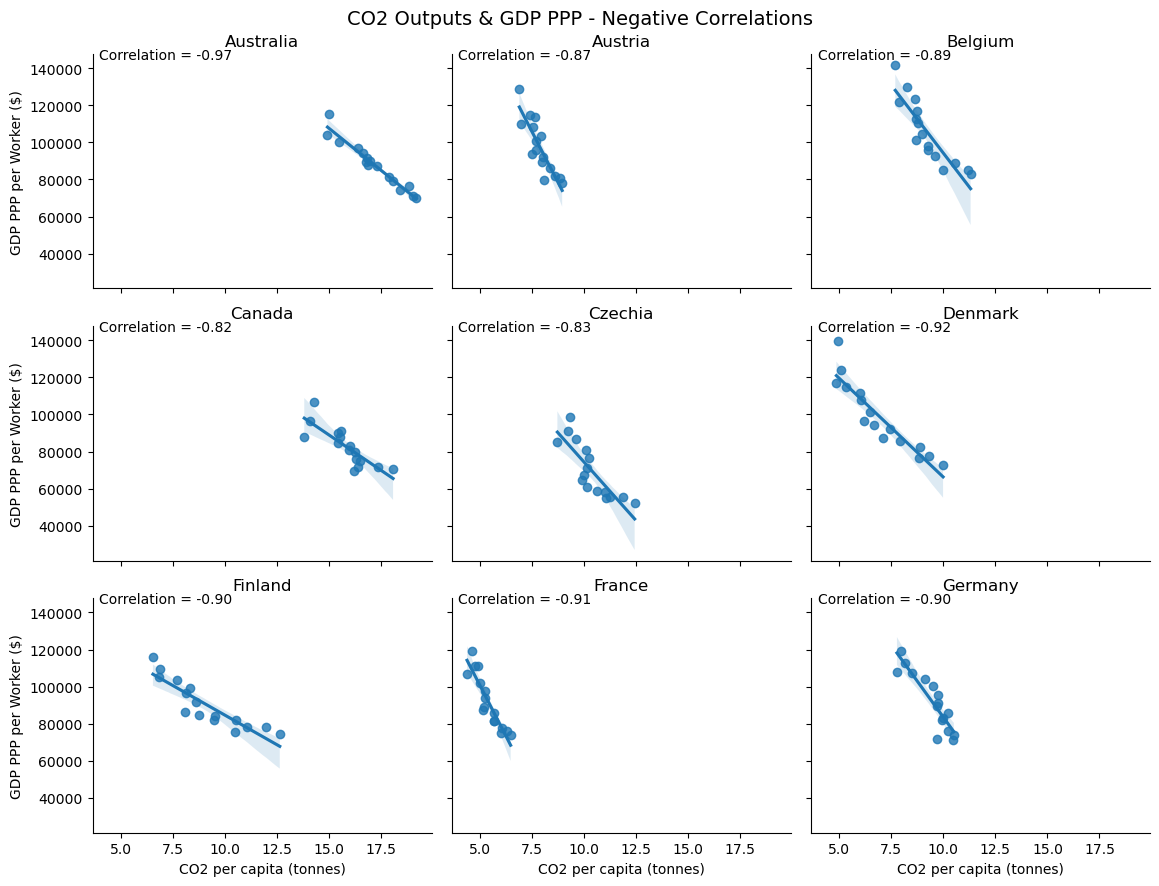

In [21]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker $', 'co2_per_capita']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.02, .98, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=Co2OutputNegCntrys1, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='co2_per_capita', y='GDP PPP per Worker $')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=.93)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(NegCountries1[i])
    ax.set_xlabel("CO2 per capita (tonnes)")
    ax.set_ylabel("GDP PPP per Worker ($)")
# g.set_axis_labels('CO2 per Captia (tonnes)', 'GDP PPP per Worker ($)')
# g.set_titles(col_template="{col_name}")

g.figure.suptitle('CO2 Outputs & GDP PPP - Negative Correlations', fontsize=14)
g.savefig('GdpAndCo2_NegCorr1.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


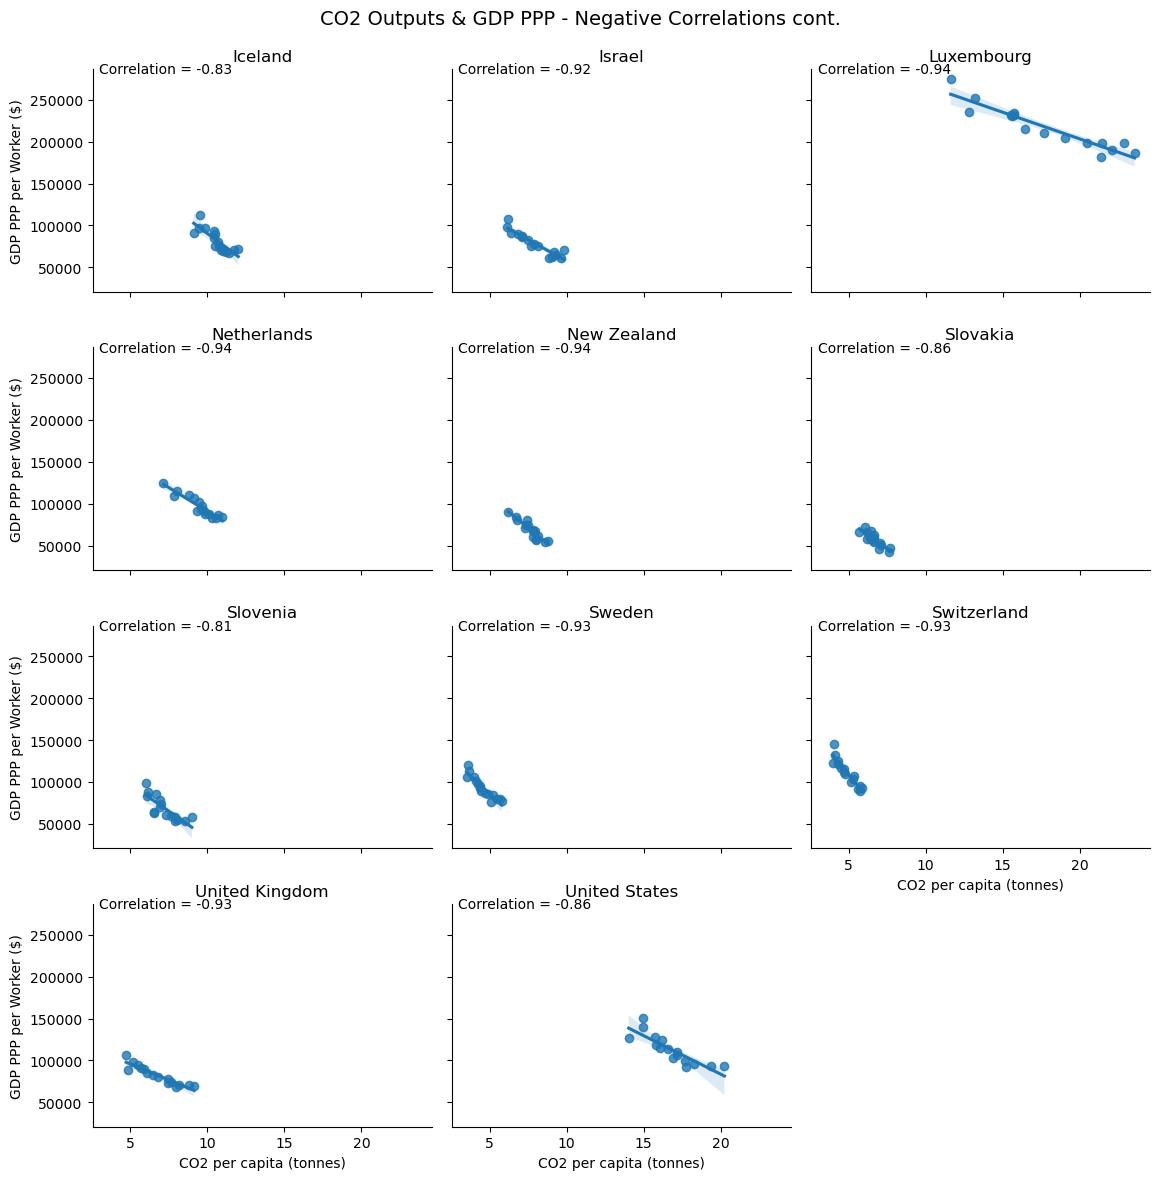

In [65]:
g = sns.FacetGrid(data=Co2OutputNegCntrys2, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='co2_per_capita', y='GDP PPP per Worker $')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=.93)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(NegCountries2[i])
    ax.set_xlabel("CO2 per capita (tonnes)")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.suptitle('CO2 Outputs & GDP PPP - Negative Correlations cont.', fontsize=14)
g.savefig('GdpAndCo2_NegCorr2.png', dpi=300)

In [12]:
PosCountriesMedOutput = [
    'France', 'Germany', 'United Kingdom'
]
Co2MedOutputPosCntrys = Co2AndGdp[Co2AndGdp['country'].isin(PosCountriesMedOutput)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


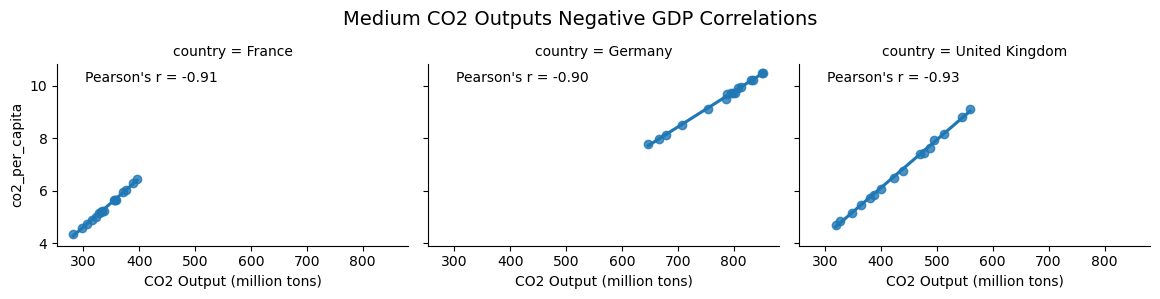

In [13]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker $', 'co2_per_capita']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=Co2MedOutputPosCntrys, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='CO2 Output (million tons)', y='co2_per_capita')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=.8)
g.figure.suptitle('Medium CO2 Outputs Negative GDP Correlations', fontsize=14)
g.savefig('GdpAndCo2_MedOutputNegCorr.png', dpi=300)

In [51]:
# Positive Correlation Countries
PosCntrysLowOutput = [
    'Belgium', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Israel', 'Luxembourg', 
    'Netherlands', 'Slovakia', 'Slovenia', 'Sweden', 'Switzerland',
]
# positiveCountries2 =['Finland']

Co2AndGdpPosCntrysLowOutput = Co2AndGdp[Co2AndGdp['country'].isin(PosCntrysLowOutput)]
# Co2AndGdpPositiveCountries2 = Co2AndGdp[Co2AndGdp['country'].isin(positiveCountries2)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


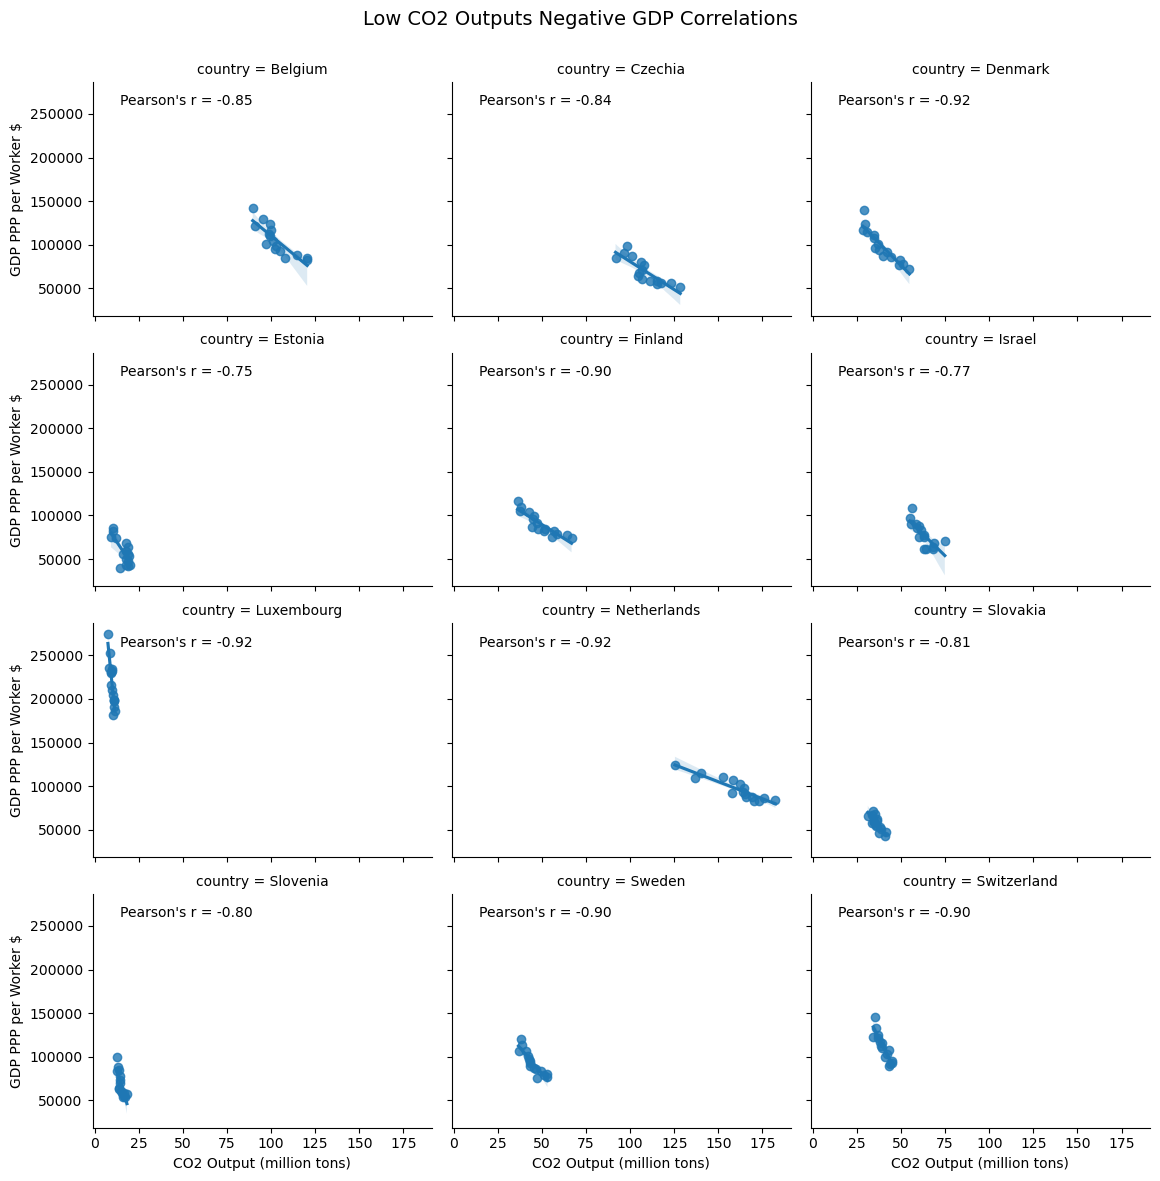

In [52]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker $', 'CO2 Output (million tons)']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=Co2AndGdpPosCntrysLowOutput, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='CO2 Output (million tons)', y='GDP PPP per Worker $')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=0.92)
g.figure.suptitle('Low CO2 Outputs Negative GDP Correlations', fontsize=14)
g.savefig('GdpAndCo2_LowOutputNegCorr.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


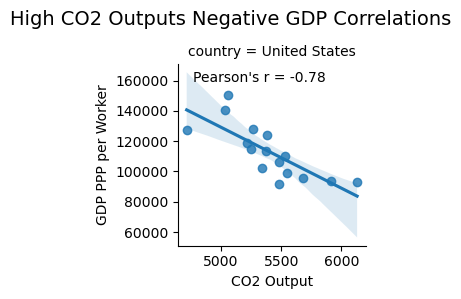

In [36]:
g = sns.FacetGrid(data=Co2AndGdp[Co2AndGdp['country'] == 'United States'], col='country', col_wrap=1)
g.map_dataframe(sns.regplot, x='CO2 Output (million tons)', y='GDP PPP per Worker $')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('High CO2 Outputs Negative GDP Correlations', fontsize=14)
g.savefig('CO2AndGDP_USA.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_13179/3995801754.py:8: UserWarning: The figure layout has changed to tight
  g.figure.tight_layout()


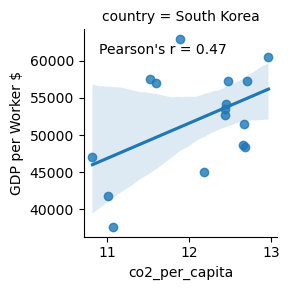

In [69]:
def annotate(data, **kws):
    r = data[['GDP per Worker $', 'co2_per_capita']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .88, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)
g = sns.FacetGrid(data=Co2AndGdp[Co2AndGdp['country'] == 'South Korea'], col='country', col_wrap=1)
g.map_dataframe(sns.regplot, x='co2_per_capita', y='GDP per Worker $')
g.map_dataframe(annotate)
g.figure.tight_layout()
# g.figure.subplots_adjust(top=0.8)
# g.figure.suptitle('High CO2 Outputs Negative GDP Correlations', fontsize=14)
g.savefig('GdpAndCO2_Korea.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


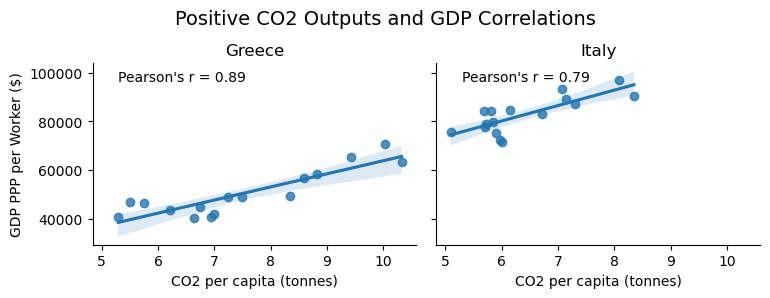

In [74]:
PosCorrCountries = ['Greece', 'Italy']
Co2AndGdpPosCntrys = Co2AndGdp[Co2AndGdp['country'].isin(PosCorrCountries)]

g = sns.FacetGrid(data=Co2AndGdpPosCntrys, col='country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='co2_per_capita', y='GDP per Worker $')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=.8)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(PosCorrCountries[i])
    ax.set_xlabel("CO2 per capita (tonnes)")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.suptitle('Positive CO2 Outputs and GDP Correlations', fontsize=14)
g.savefig('GdpAndCo2_ItalyAndGreece.png', dpi=300)